In [186]:
import pandas as pd
import numpy as np 
from sklearn.datasets import make_classification
from matplotlib import pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

df = pd.read_csv('pima_indian_data.csv')
df.head()

,Number of times pregnant,Plasma glucose,Diastolic blood pressure,Triceps skinfold thickness,serum insulin,Body mass index,Diabetes pedigree function,Age,Class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [187]:
df.dtypes

Number  of times pregnant       int64
Plasma glucose                  int64
Diastolic blood pressure        int64
Triceps skinfold thickness      int64
serum insulin                   int64
Body mass index               float64
Diabetes pedigree function    float64
Age                             int64
Class                           int64
dtype: object

In [188]:
df.isna().sum().sum()

0

In [189]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Number of times pregnant,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Plasma glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
Diastolic blood pressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
Triceps skinfold thickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
serum insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
Body mass index,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
Diabetes pedigree function,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Class,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


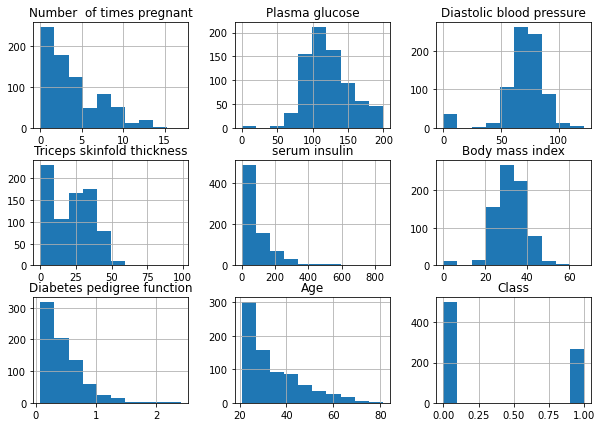

In [218]:
import matplotlib.pyplot as plt
%matplotlib inline

df.hist(figsize=(10,7))
plt.show()

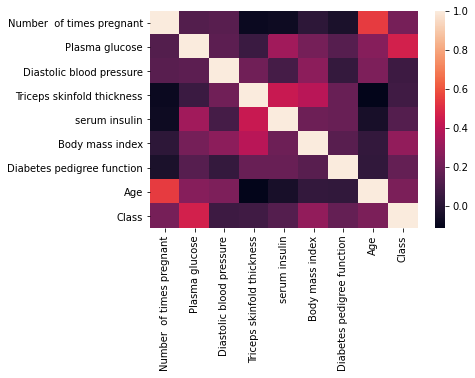

In [219]:
import seaborn as sns

sns.heatmap(df.corr())
plt.show()

In [220]:
X = df['Age']
y = df['Class']
x_df = df ['Plasma glucose']

from sklearn.model_selection import train_test_split

def create_splits(X, y):
    return train_test_split(X, y, test_size=0.20)

X_train, X_test, y_train, y_test = create_splits(X, y)

print(f'Training sample: {X_train.shape[0]:,}')
print(f'Test sample: {X_test.shape[0]:,}')

Training sample: 614
Test sample: 154


In [190]:
Xdf = df.drop(['Plasma glucose'], axis=1)
Ydf = df['Plasma glucose']
X_train, X_test, y_train, y_test =train_test_split(Xdf, Ydf, test_size=0.3, random_state=20)

In [191]:
X_train.head()

,Number of times pregnant,Diastolic blood pressure,Triceps skinfold thickness,serum insulin,Body mass index,Diabetes pedigree function,Age,Class
416,1,68,21,0,27.2,1.095,22,0
373,2,58,40,94,34.9,0.225,25,0
166,3,66,25,0,32.5,0.256,22,0
685,2,74,26,205,33.2,0.591,25,0
156,2,52,15,94,24.6,0.637,21,0


In [192]:
len(X_train)

537

In [193]:
#svm can be used for regression model for caculating an expecting value 

In [194]:
SVdf = SVC(kernel = 'linear', C=1, gamma="auto")
SVdf.fit(X_train, y_train)

SVC(C=1, gamma='auto', kernel='linear')

In [195]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression

def generate_estimates(x, y, comp=5):
    
    modeling_pipeline = Pipeline([
        ('scaling', StandardScaler()),
         ('pca', PCA(n_components=5)),
         ('model', LogisticRegression(penalty='none'))
        ]
    )

    return modeling_pipeline.fit(x, y)
m = generate_estimates(X_train, y_train)
m

/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Pipeline(steps=[('scaling', StandardScaler()), ('pca', PCA(n_components=5)),
                ('model', LogisticRegression(penalty='none'))])

In [196]:
from sklearn.metrics import roc_curve

def generate_probs(X, model=m):
    return model.predict_proba(X)[:, 1]

def generate_roc(y, probs):
    fpr, tpr, _ = roc_curve(y, probs)
    return fpr, tpr


In [197]:
from sklearn.metrics import confusion_matrix

y_test_pred = m.predict(X_test)

print(confusion_matrix(y_test, y_test_pred))

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [198]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score 

In [199]:
confusion_matrix(y_train, SVdf.predict(X_train) )

array([[2, 0, 0, ..., 0, 0, 0],
       [0, 2, 0, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 3, 0, 0],
       [0, 0, 0, ..., 0, 1, 0],
       [0, 0, 0, ..., 0, 0, 1]])

In [200]:
accuracy_score(y_train, SVdf.predict(X_train))

0.5921787709497207

In [202]:
from sklearn.metrics import accuracy_score
accuracy_score(["Plasma glucose", "Number of times pregnant"], ["Plasma glucose", "Body mass index"])

0.5

In [210]:
from sklearn.ensemble import RandomForestClassifier
X_train, X_test, y_train, y_test = train_test_split(Xdf,Ydf,test_size=0.2, random_state=1)
model = RandomForestClassifier(random_state=1)
model.fit(X_train, y_train)
preds = model.predict(X_test)

In [211]:
from sklearn.model_selection import cross_val_score, cross_val_predict, StratifiedKFold
from sklearn.base import BaseEstimator
import numpy as np

class BaseClassifier(BaseEstimator):
    def fit(self, X, y=None):
        pass
    def predict(self, X):
        return np.zeros((len(X), 1), dtype=bool)
    
base_clf = BaseClassifier()
cross_val_score(base_clf, X_train, y_train, cv=130, scoring="accuracy").mean()


0.005

In [212]:
df.columns

Index(['Number  of times pregnant', 'Plasma glucose',
       'Diastolic blood pressure', 'Triceps skinfold thickness',
       'serum insulin', 'Body mass index', 'Diabetes pedigree function', 'Age',
       'Class'],
      dtype='object')

In [213]:
cols = ['Number  of times pregnant', 'Plasma glucose',
       'Diastolic blood pressure', 'Triceps skinfold thickness',
       'serum insulin', 'Body mass index', 'Diabetes pedigree function',
       'Class']
x = df[cols]
y = df ['serum insulin']

In [214]:
X_train, X_test, y_train , y_test = train_test_split(X,y)

In [215]:
scale = StandardScaler()
ohe = OneHotEncoder()
logreg = LogisticRegression()

In [216]:
from sklearn.compose import make_column_transformer
ct = make_column_transformer(
    (ohe,['Body mass index']), 
    (scale,['Plasma glucose']),
     remainder ='passthrough')

In [217]:
from sklearn.pipeline import make_pipeline
pipe = make_pipeline(ct, logreg)
pipe.fit(X_train,y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(),
                                                  ['Body mass index']),
                                                 ('standardscaler',
                                                  StandardScaler(),
                                                  ['Plasma glucose'])])),
                ('logisticregression', LogisticRegression())])

In [234]:
import sklearn.neighbors as nei
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import KFold
# Predict the outcome - knn

X = df[['Plasma glucose',
       'Diastolic blood pressure', 'Triceps skinfold thickness',
       'serum insulin', 'Body mass index']]
Y = df['Class']

knn = nei.KNeighborsClassifier(n_neighbors=10)


In [235]:
knn.fit(X, Y)

KNeighborsClassifier(n_neighbors=10)

In [236]:
(knn.predict(X) == Y).sum()

592

In [238]:
X_test.value_counts()

21    13
22    13
25    12
23     9
28     9
24     9
27     8
26     6
41     6
29     5
33     5
44     4
38     4
42     4
31     4
34     4
32     4
57     4
46     3
40     3
30     3
37     2
36     2
35     2
49     2
43     2
54     2
70     1
65     1
60     1
58     1
52     1
55     1
48     1
47     1
45     1
72     1
Name: Age, dtype: int64

In [246]:
from sklearn import metrics

outputs_pred = knn.predict(X)
accuracy = metrics.accuracy_score(Y, outputs_pred)
accuracy

0.7708333333333334

In [247]:
scores = cross_val_score (knn,X, Y, cv =10, scoring = 'accuracy')
scores

array([0.75324675, 0.75324675, 0.74025974, 0.68831169, 0.71428571,
       0.74025974, 0.7012987 , 0.80519481, 0.72368421, 0.68421053])

In [248]:
scores.mean()

0.7303998632946003

In [249]:
lg = LogisticRegression()
lg_accuracy = cross_val_score(lg,X,Y,cv=10,scoring='accuracy')

In [250]:
lg_accuracy.mean()

0.759090909090909